In [513]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dicom
from medpy import filter
%matplotlib inline

In [514]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [515]:
#READ THE IMAGE
ct_liver = cv2.imread('JPEG/image_75 CT p13.jpg') 
img = ct_liver.copy()  # DISPLAY
img2 = ct_liver.copy()

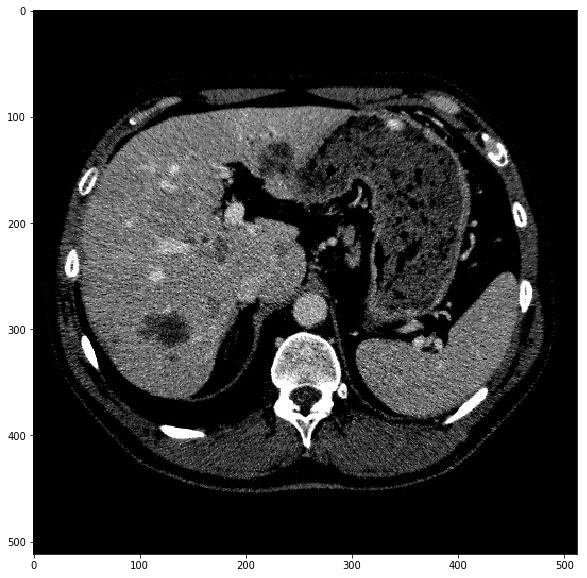

In [516]:
display(ct_liver)

In [517]:
# APPLY BLUR
img = cv2.medianBlur(img,3) # DISPLAY

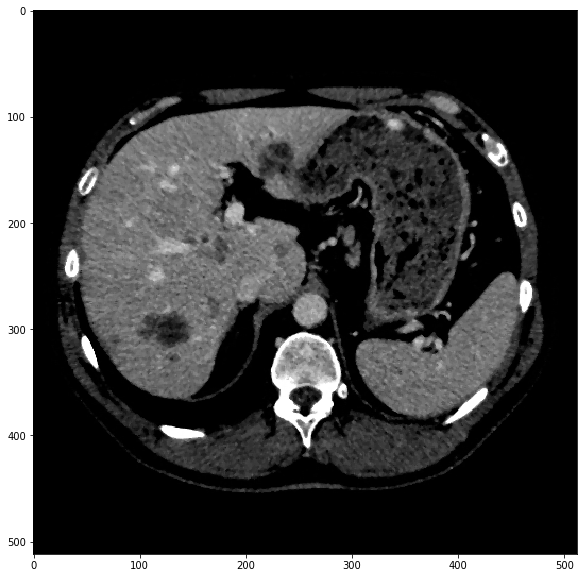

In [518]:
display(img)

In [519]:
# CONVERT TO GRAY SCALE
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [520]:
# APPLY THRESHOLD NOT BINARY ==> APPLY OTSU'S METHOD
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)  # DISPLAY

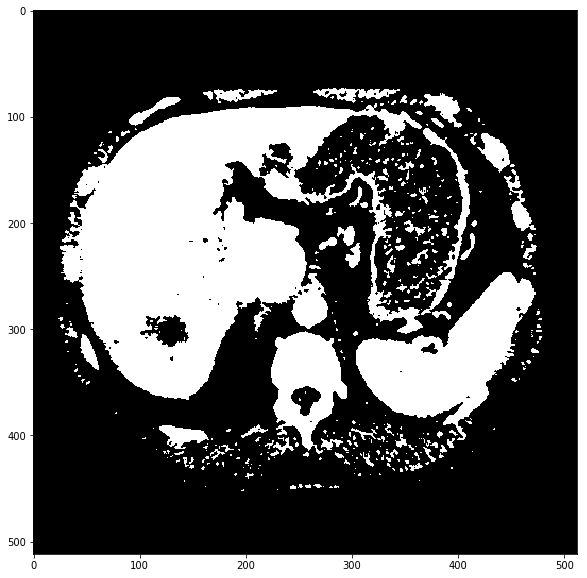

In [521]:
display(thresh)

In [522]:
# NOISE REMOVAL (OPTIONAL)
kernel = np.ones((3,3),np.uint8)

In [523]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)     # DISPLAY

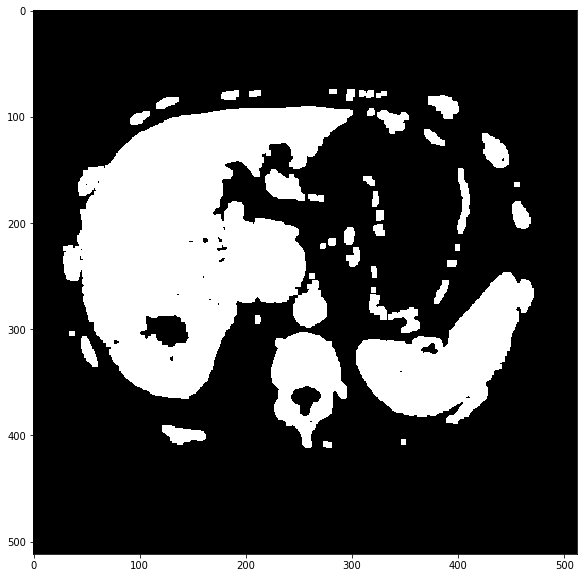

In [524]:
display(opening)

In [525]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)  # DISPLAY

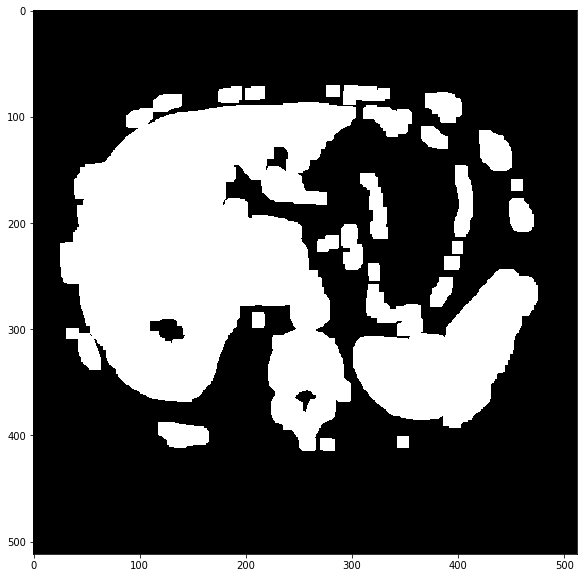

In [526]:
display(sure_bg)

In [527]:
# DISTANCE TRANSFORM
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) # DISPLAY

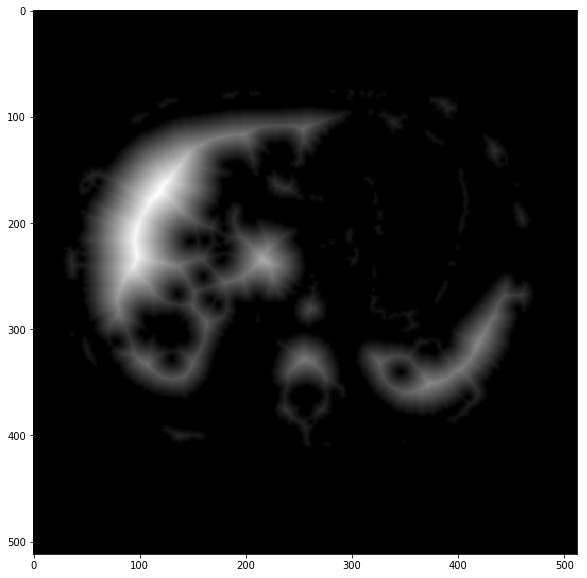

In [528]:
display(dist_transform)

In [529]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0) # DISPLAY

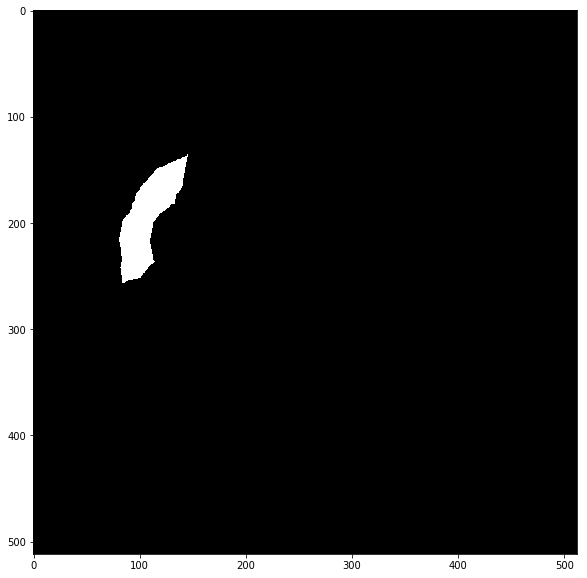

In [530]:
display(sure_fg)

In [531]:
sure_fg = np.uint8(sure_fg)

In [532]:
unknown = cv2.subtract(sure_bg,sure_fg) # DISPLAY

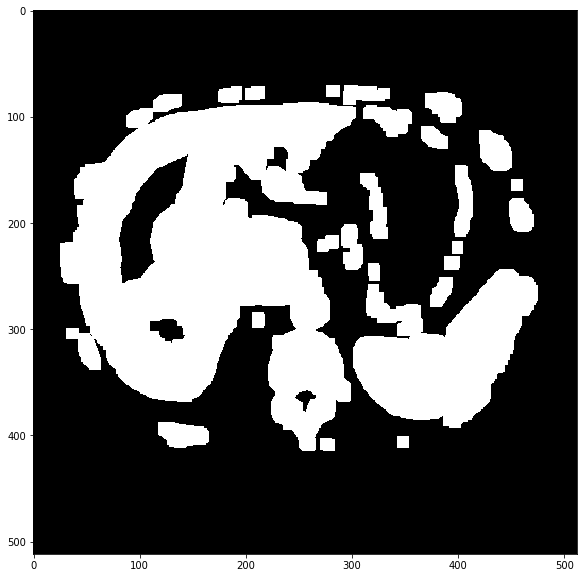

In [533]:
display(unknown)

In [534]:
# CREATING MARKERS => 3 STEPS

# 1. GETTING MARKERS

ret, markers = cv2.connectedComponents(sure_fg)

In [535]:
markers = markers + 1

In [536]:
markers[unknown == 255] = 0  # DISPLAY

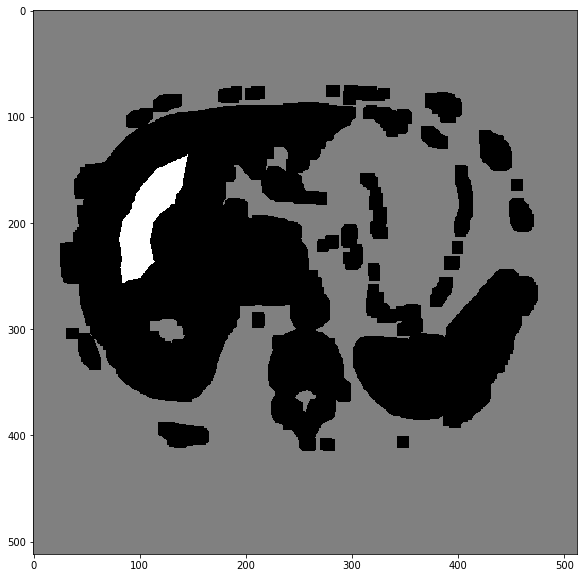

In [537]:
display(markers)

In [538]:
markers = cv2.watershed(img,markers)   # DISPLAY

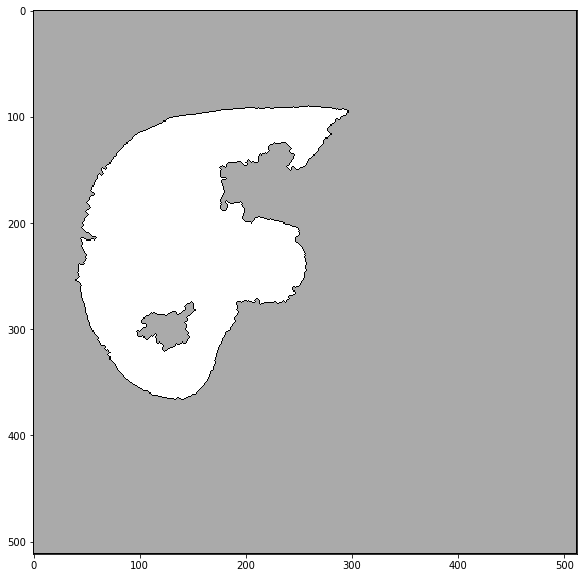

In [539]:
display(markers)

In [540]:
image, contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [541]:
for i in range(len(contours)) :
    if hierarchy[0][i][3] == -1 :
        cv2.drawContours(ct_liver,contours,i,(255,0,0),1)

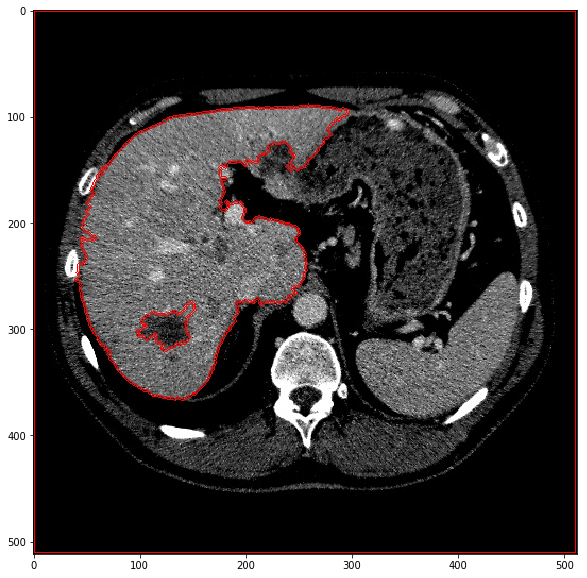

In [542]:
display(ct_liver)

In [543]:
# contours

In [544]:
mask = np.zeros(ct_liver.shape, np.uint8)
largest_areas = sorted(contours, key=cv2.contourArea)
a = cv2.drawContours(mask, [largest_areas[-3]], 0, (255,255,255,255), -1)
# removed = cv2.add(ct_liver, mask)

# cv2.imwrite("removed.png", removed)

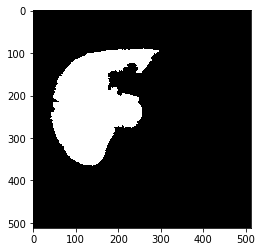

In [545]:
plt.imshow(mask)

In [546]:
final_im = mask*img2

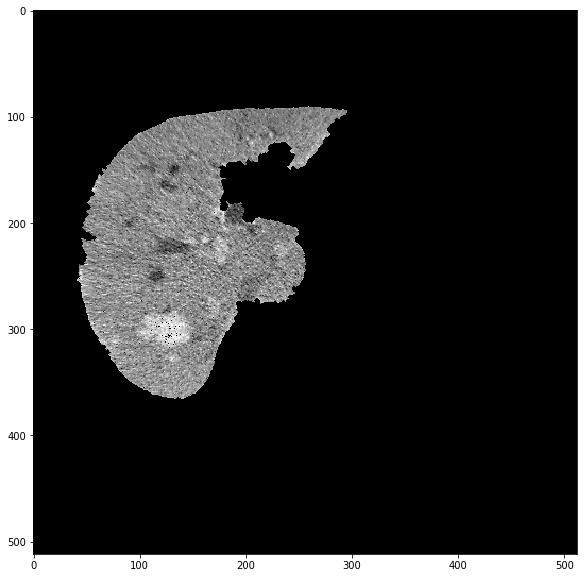

In [547]:
display(final_im)

In [548]:
res_img = final_im.copy()

In [617]:
# res_img = medpy.filter.smoothing.anisotropic_diffusion(final_im,niter=5, kappa=25, gamma=0.1, voxelspacing=None, option=1)

In [618]:
# display(res_img)

In [623]:
kernel = np.ones((3,3),dtype=np.uint8)
final_result = cv2.erode(final_im,kernel,iterations=1)

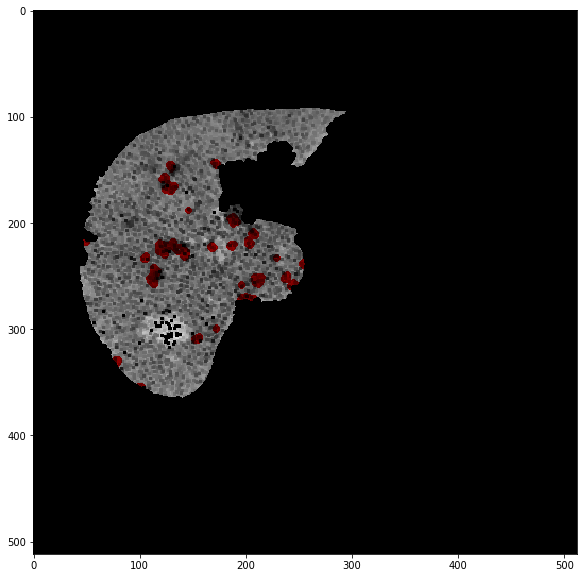

In [624]:
display(final_result)

In [553]:
hsv = cv2.cvtColor(final_result,cv2.COLOR_BGR2HSV)

In [554]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

In [555]:
res = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

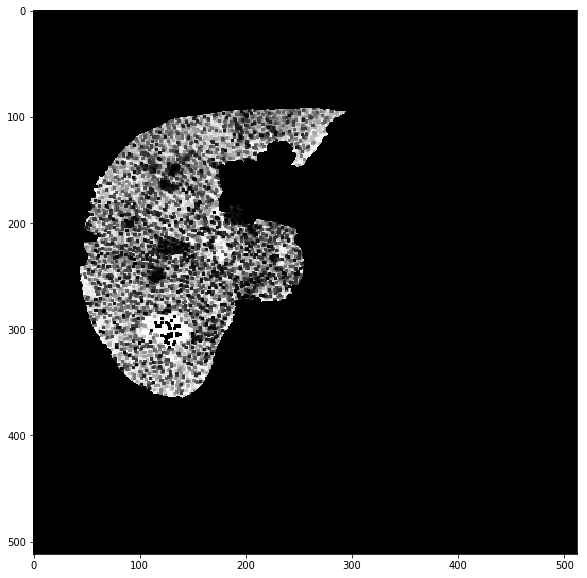

In [556]:
display(res)

In [557]:
outp = cv2.subtract(final_im,res)

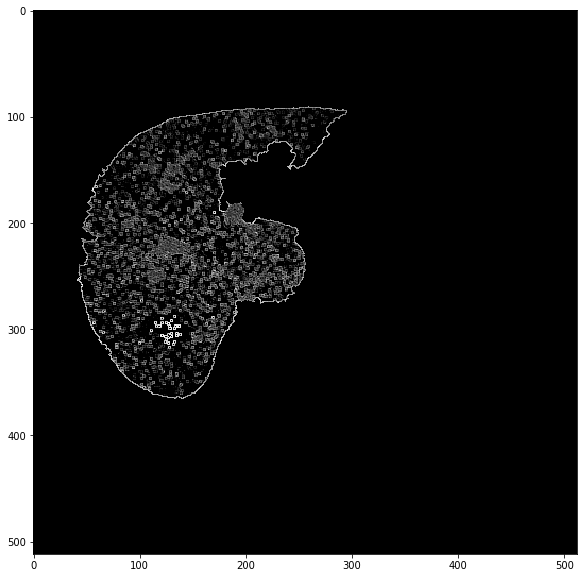

In [558]:
display(outp)

In [559]:
outp_gray = cv2.cvtColor(outp,cv2.COLOR_BGR2GRAY)

In [619]:
ret, ct_thresh = cv2.threshold(outp_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)  # DISPLAY

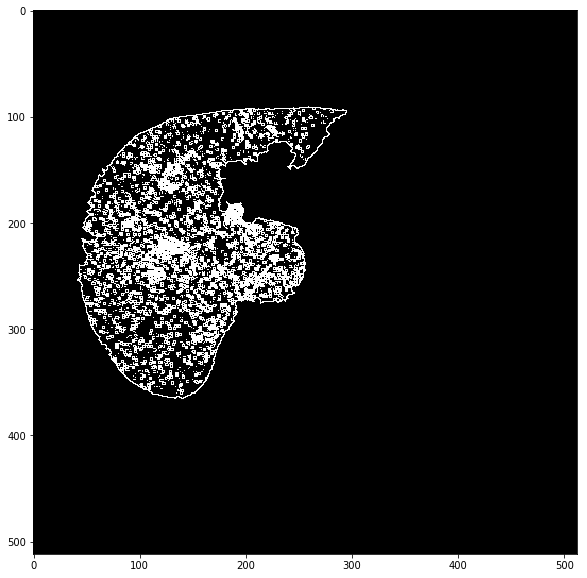

In [620]:
display(ct_thresh)

In [562]:
# NOISE REMOVAL (OPTIONAL)
kernel = np.ones((3,3),np.uint8)

In [584]:
opening = cv2.morphologyEx(ct_thresh,cv2.MORPH_OPEN,kernel,iterations = 1)     # DISPLAY

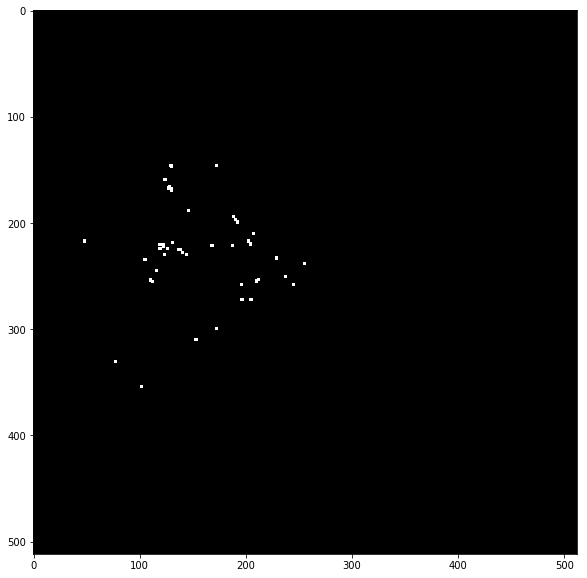

In [585]:
display(opening)

In [586]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)  # DISPLAY

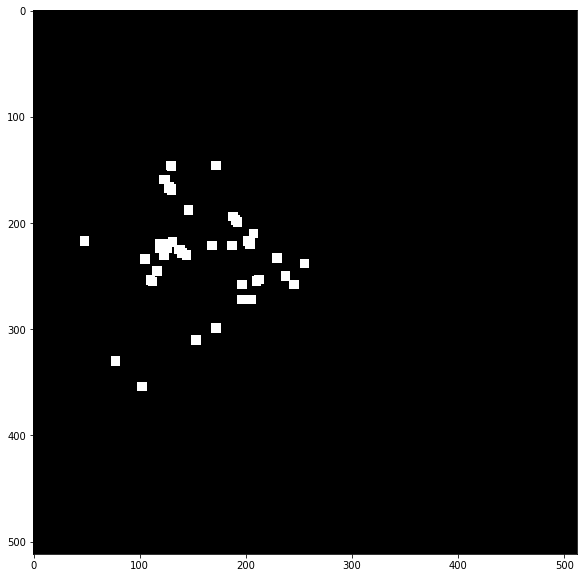

In [587]:
display(sure_bg)

In [588]:
# DISTANCE TRANSFORM
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) # DISPLAY

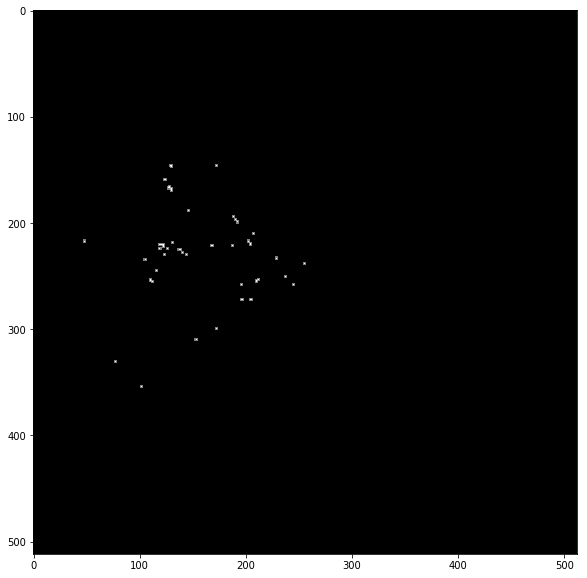

In [589]:
display(dist_transform)

In [590]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0) # DISPLAY

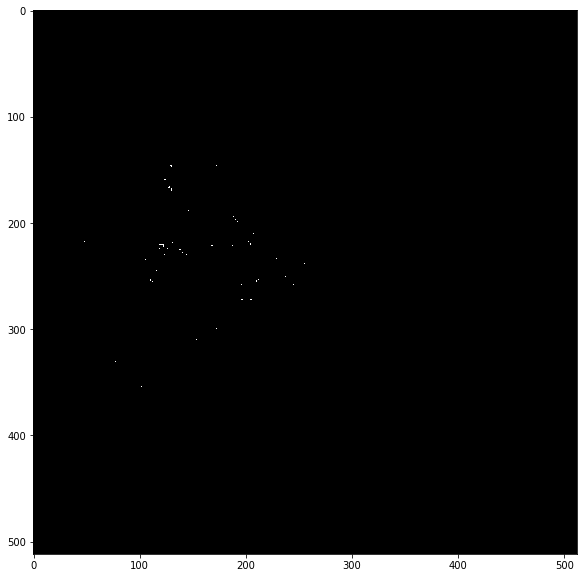

In [591]:
display(sure_fg)

In [592]:
sure_fg = np.uint8(sure_fg)

In [593]:
unknown = cv2.subtract(sure_bg,sure_fg) # DISPLAY

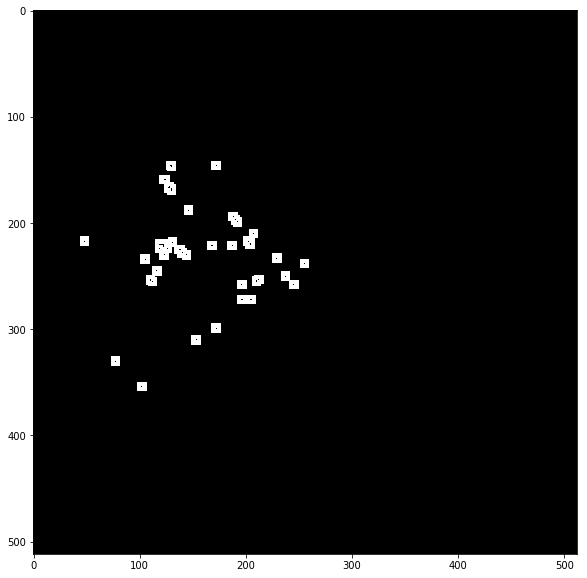

In [594]:
display(unknown)

In [595]:
# CREATING MARKERS => 3 STEPS

# 1. GETTING MARKERS

ret, markers = cv2.connectedComponents(sure_fg)

In [596]:
markers = markers + 1

In [597]:
markers[unknown == 255] = 0  # DISPLAY

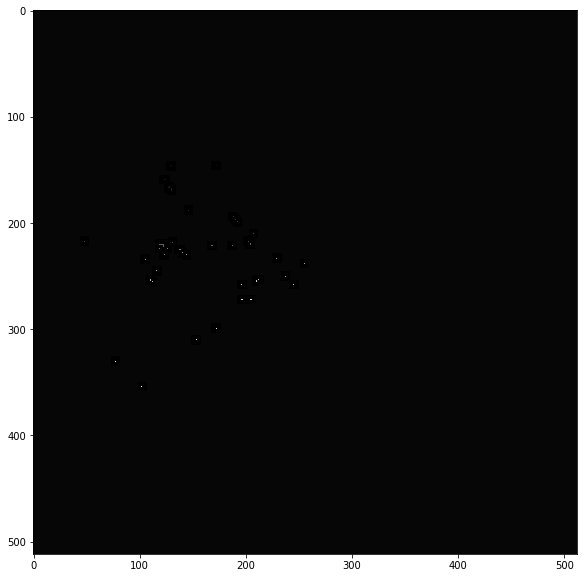

In [598]:
display(markers)

In [599]:
markers = cv2.watershed(img,markers)   # DISPLAY

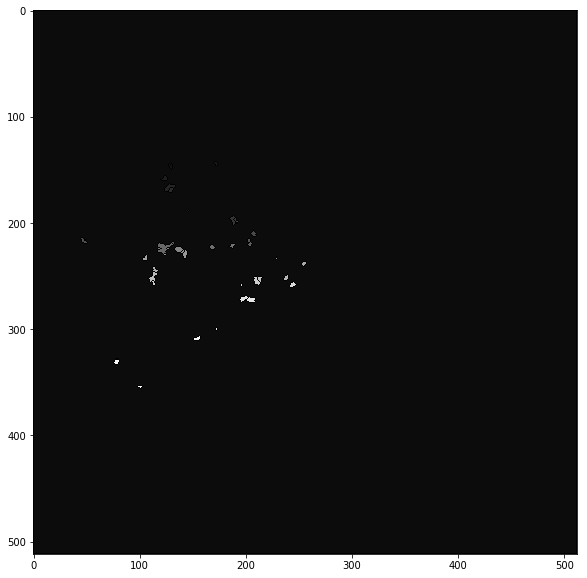

In [600]:
display(markers)

In [601]:
image, contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [602]:
for i in range(len(contours)) :
    if hierarchy[0][i][3] == -1 :
        cv2.drawContours(final_im,contours,i,(255,0,0),1)

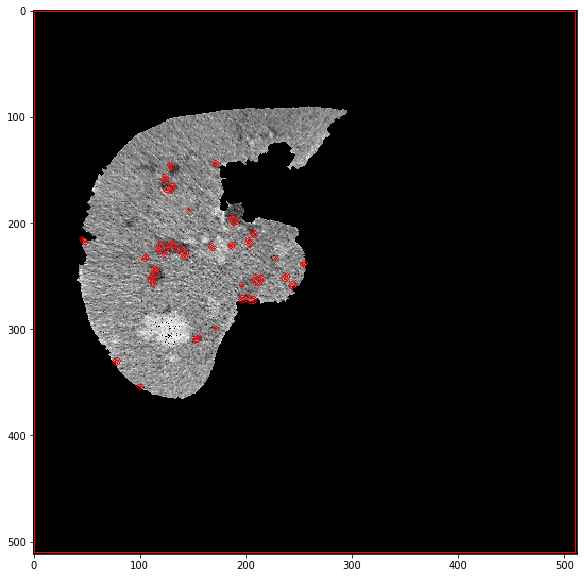

In [603]:
display(final_im)

In [611]:
mask = np.zeros(ct_liver.shape, np.uint8)
largest_areas = sorted(contours, key=cv2.contourArea)
a = cv2.drawContours(mask, largest_areas[:-1], 0, (255,255,255,255), -1)
# removed = cv2.add(ct_liver, mask)

# cv2.imwrite("removed.png", removed)

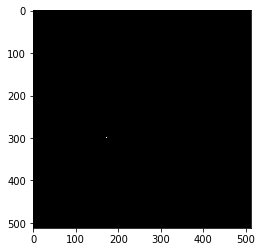

In [612]:
plt.imshow(mask)

In [613]:
result = mask*res_img

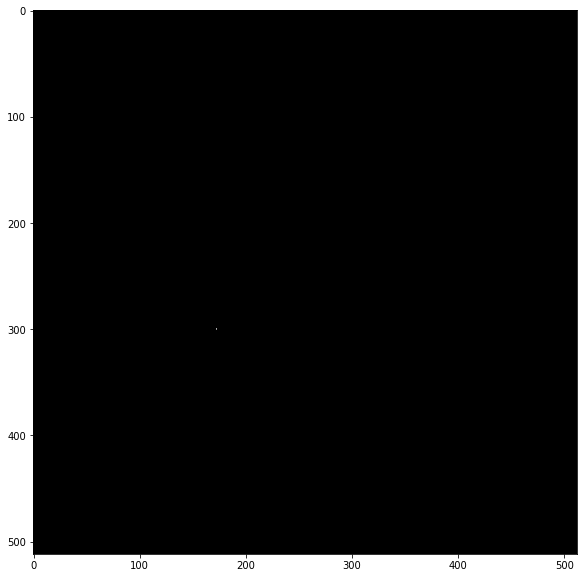

In [614]:
display(result)